# 1.Know the problem clearly

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).**

# 2.Data Gathering

### Import the required packages

In [1]:
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns      # for visualisations
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [2]:
train_data = pd.read_csv(r'\Users\Sreenivasulu\Downloads\\train_titanic.csv')
train_data.head()
#training data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv(r"\Users\Sreenivasulu\Downloads\\test_titanic.csv")
test_data.head()
# testing data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_data = pd.read_csv(r"\Users\Sreenivasulu\Downloads\\gender_submission_titanic.csv")
gender_data.head()
#sample submission data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# 3.Data Preprocessing

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
print(train_data.isnull().sum())
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Age column has 177 null values 
train_age_mean = train_data["Age"].mean()
test_age_mean = test_data["Age"].mean()


# replacing null values with mean of ages
train_data["Age"].replace(np.nan,train_age_mean,inplace=True)
test_data["Age"].replace(np.nan,test_age_mean,inplace=True)

In [10]:
print(train_data.isnull().sum())
test_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
embarked_mode = train_data['Embarked'].mode()[0]
data = [train_data, test_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

In [12]:
#cabin column is categorical and has huge null values, soo consider better to drop it
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

# 4.E.D.A process

<AxesSubplot:xlabel='Age', ylabel='count'>

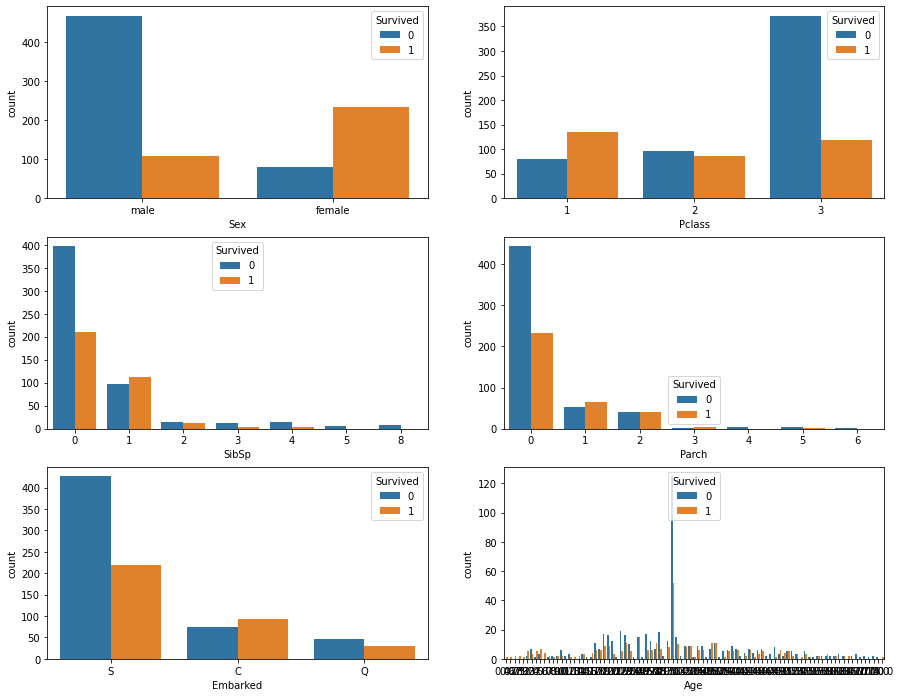

In [13]:
fig, axes = plt.subplots(3, 2, figsize= (15,12))
sns.countplot(train_data.Sex, hue = train_data.Survived, ax = axes[0,0])
sns.countplot(train_data.Pclass, hue = train_data.Survived, ax = axes[0,1])
sns.countplot(train_data.SibSp, hue = train_data.Survived, ax = axes[1,0])
sns.countplot(train_data.Parch, hue = train_data.Survived,ax= axes[1,1])
sns.countplot(train_data.Embarked, hue = train_data.Survived,ax = axes[2,0])
sns.countplot(train_data.Age, hue = train_data.Survived,ax = axes[2,1])

In [14]:
train_data.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [15]:
train_data.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

# 5. Feature Engineering

- PassengerId, Name, Ticket, Fare, Cabin add no value to predictions soo dropping them is good 

In [16]:
features = ["Pclass", "Sex", "SibSp", "Parch","Embarked"]

X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

X_testt = pd.get_dummies(test_data[features])

# 6.Predictive Modelling

In [17]:
from sklearn.ensemble import RandomForestClassifier                              #import model


model = RandomForestClassifier(n_estimators=750, max_depth=9, random_state=42)   
model.fit(X, y)                                                                  #model fitting

RandomForestClassifier(max_depth=9, n_estimators=750, random_state=42)

In [18]:
# Checking the model scores
print('The model score for training dataset : ',model.score(X,y))


The model score for training dataset :  0.8372615039281706


##### Just to check for overfitting 

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print("The model score for splitted training dataset :",model.score(X_train,Y_train))
print("The model score for splitted testing dataset :",model.score(X_test,Y_test))

The model score for splitted training dataset : 0.8426966292134831
The model score for splitted testing dataset : 0.8246268656716418


In [20]:
predictions = model.predict(X_testt)

In [22]:
# submission = pd.read_csv('../input/titanic/gender_submission.csv')
gender_data['Survived'] = predictions
gender_data.to_csv('submission.csv', index=False)